In [1]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

sns.set(context='notebook', style='white', font_scale=1.2)

In [2]:
try:
    import crossmapy as cmp
except:
    import sys
    sys.path.append('../')
    import crossmapy as cmp

In [3]:
res_dir = f'results/foodchain/'
if not os.path.exists(res_dir):
    os.makedirs(res_dir)

In [4]:
def main():
    embed_dim = 20
    n_neighbor = 3
    GC = cmp.GrangerCausality(embed_dim=embed_dim)
    TE = cmp.TransferEntropy(embed_dim=embed_dim)
    CCM = cmp.ConvergeCrossMapping(embed_dim=embed_dim, n_neighbor=n_neighbor)
    PCM = cmp.PartialCrossMapping(embed_dim=embed_dim, n_neighbor=n_neighbor)
    CMC = cmp.CrossMappingCardinality(embed_dim=embed_dim, n_neighbor=n_neighbor)
    DCMC = cmp.DirectCrossMappingCardinality(embed_dim=embed_dim, n_neighbor=n_neighbor)
    
    methods = [GC, TE, CCM, PCM, CMC, DCMC]
    labels = ['GC', 'TE', 'CCM', 'PCM', 'CMC', 'DCMC']
    
    data = np.load(f'../data/foodchain/food_chain.npy')
    
    res_dir = f'results/foodchain/'
    for i, method in enumerate(methods):
        method.fit(data)
        np.save(f'{res_dir}method{labels[i]}.npy', method.scores)
        print(f'method {labels[i]} complete!')

In [5]:
main()

method GC complete!
method TE complete!
method CCM complete!
method PCM complete!
method CMC complete!
method DCMC complete!


In [6]:
labels = ['Calanoid\ncopepods', 'Rotifers', 'Nano\nflagellates', 'Pico\ncyanobacteria']

In [7]:
data = np.load(f'../data/foodchain/food_chain.npy')

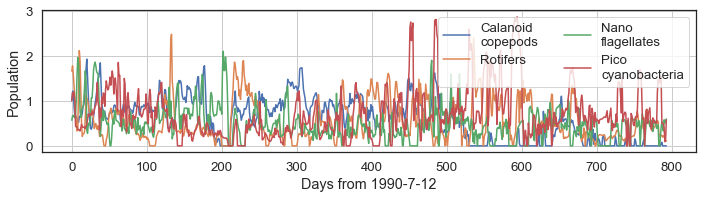

In [8]:
fig, ax = plt.subplots(figsize = (10, 3))
ax.plot(data, label=labels)
ax.set_xlabel('Days from 1990-7-12')
ax.set_ylabel('Population')
ax.legend(ncol=2)
ax.grid()
plt.tight_layout()

In [10]:
methods = ['GC', 'TE', 'CCM', 'PCM', 'CMC', 'DCMC']

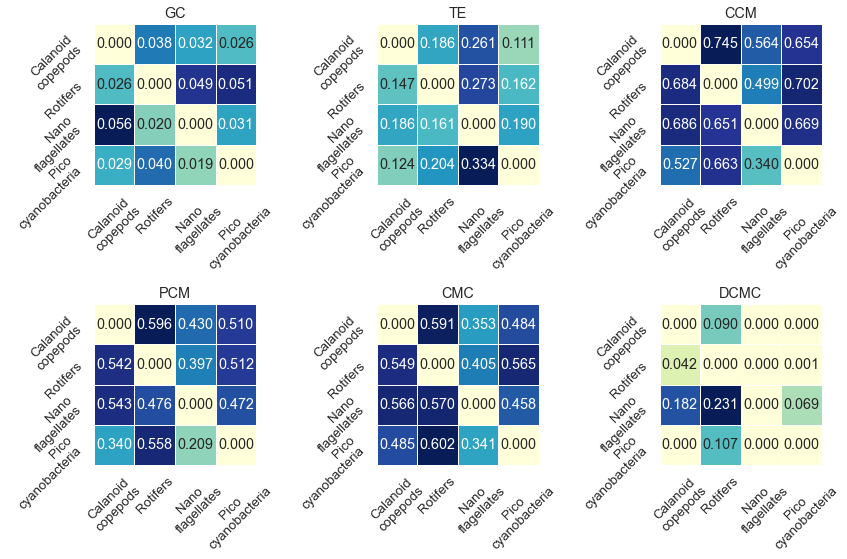

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()
for i, method in enumerate(methods):
    mat = np.load(f'{res_dir}method{method}.npy')
    ax[i] = cmp.plot_score_matrix(mat, cbar=False, labels=labels, ticklabel_rotation=45, annot=True, ax=ax[i])
    ax[i].set_title(method)

In [21]:
thrs = [0.028, 0.160, 0.650, 0.475, 0.565, 0.106]
truth_mat = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 0], [1, 1, 0, 0]])

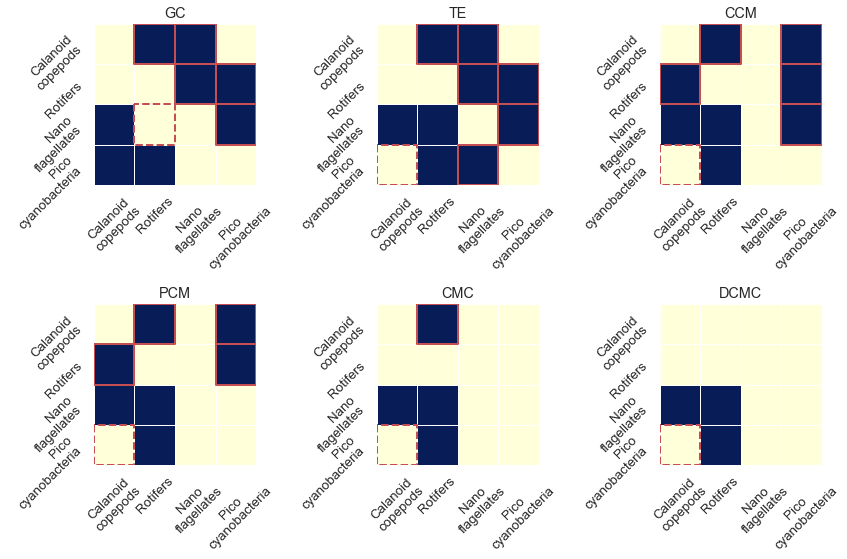

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()
for i, method in enumerate(methods):
    score = np.load(f'{res_dir}method{method}.npy')
    mat = cmp.discretize_score(score, thrs[i])
    # mat[np.diag_indices(4)] = np.nan
    false_pos = np.where((mat==1)&(truth_mat==0))
    false_neg = np.where((mat==0)&(truth_mat==1))
    ax[i] = cmp.plot_score_matrix(mat, cbar=False, labels=labels, ticklabel_rotation=45, annot=False, ax=ax[i])
    ax[i].set_title(method)
    if len(false_pos[0]) > 0:
        _ = cmp.plot_annot_square(false_pos, lw=2, c='r', ls='-', ax=ax[i])
    if len(false_neg[0]) > 0:
        _ = cmp.plot_annot_square(false_neg, lw=2, c='r', ls='--', ax=ax[i])